      Importing the Dataset and Preparing the Data

In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [10]:
# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [11]:
# Add the target variable to the dataframe
df['target'] = data.target

In [12]:
# Show the first few rows of the dataframe
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

     Plotting the Distribution of the Target Variable Relative to One Other Variable

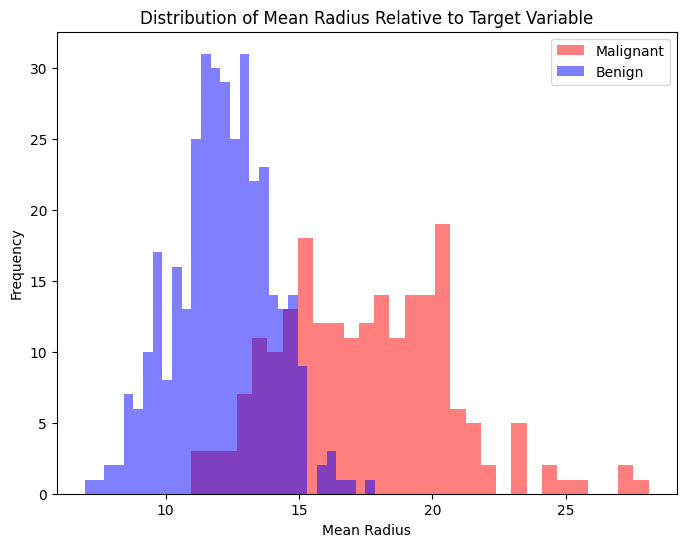

In [13]:
# Plot the distribution of the target variable relative to the 'mean radius'
plt.figure(figsize=(8, 6))
plt.hist(df[df['target'] == 0]['mean radius'], bins=30, alpha=0.5, label='Malignant', color='red')
plt.hist(df[df['target'] == 1]['mean radius'], bins=30, alpha=0.5, label='Benign', color='blue')
plt.title('Distribution of Mean Radius Relative to Target Variable')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend()
plt.show()


          Training a Logistic Regression Model

In [14]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

In [15]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we are going to use logistic regression model

In [16]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000)

In [17]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [18]:
y_pred = model.predict(X_test)
print(f"Predictions: {y_pred[:5]}")  # Check first 5 predictions


Predictions: [1 0 0 1 1]


let's evalute the performance of our model

In [19]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.98

Confusion Matrix:
[[ 61   2]
 [  2 106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Group Members:     ID

Mohammedkemal     1601534
Rekik             1601577
Rediet            1601573
Lamesgn           1601853
Rediet            1601572